In [1]:
import os,sys
import scanpy as sc
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from mebocost import mebocost

In [14]:
adata = sc.read_h5ad('/public/home/zhaox/pigscRNA-seq/figures/neo_somagermcellCCC_0508.h5ad')
## check adata (cells, genes)
print(adata.shape)
### make sure your adata cover all genes and all cells
### if not, you may want to load all genes saved in raw by doing:
## adata = adata.raw.copy() ## skip if your adata already contains all genes

(4401, 19204)


In [30]:
adata = sc.read('/public/home/zhaox/pigscRNA-seq/figures/neo_processed_cellannotation0508.h5ad',cache=True)
adata

AnnData object with n_obs × n_vars = 25322 × 2263
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_chrX', 'pct_counts_chrX', 'total_counts_chrY', 'pct_counts_chrY', 'S_score', 'G2M_score', 'phase', 'doublet', 'doublet_score', 'leiden', 'cell_type', 'cell_type_new'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'chrX', 'chrY', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cell_type_colors', 'cell_type_new_colors', 'dendrogram_cell_type', 'dendrogram_cell_type_new', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [31]:
adata = adata.raw.to_adata()
adata

AnnData object with n_obs × n_vars = 25322 × 19204
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_chrX', 'pct_counts_chrX', 'total_counts_chrY', 'pct_counts_chrY', 'S_score', 'G2M_score', 'phase', 'doublet', 'doublet_score', 'leiden', 'cell_type', 'cell_type_new'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'chrX', 'chrY', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type_colors', 'cell_type_new_colors', 'dendrogram_cell_type', 'dendrogram_cell_type_new', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [32]:
adata.obs['cell_type']

AAACCCAAGAACCCGA-1        LC_DCN
AAACCCAAGAATGTTG-1        LC_DCN
AAACCCAAGAGCGACT-1    Macrophage
AAACCCAAGAGTTCGG-1           PTM
AAACCCAAGATGGTCG-1        LC_DCN
                         ...    
TTTGTTGTCCCTTTGG-1            LC
TTTGTTGTCCTGTACC-1        LC_DCN
TTTGTTGTCGCTACGG-1    Macrophage
TTTGTTGTCTACTATC-1        LC_DCN
TTTGTTGTCTGGACTA-1        LC_DCN
Name: cell_type, Length: 25322, dtype: category
Categories (7, object): ['Macrophage', 'PTM', 'EC', 'Sertoli', 'LC', 'LC_DCN', 'SPG']

In [33]:
## initiate the mebocost object
### 1. pass expression data by scanpy adata object
mebo_obj = mebocost.create_obj(
                        adata = adata,
                        group_col = ['cell_type'],
                        met_est = 'mebocost',
                        config_path = '/public/home/zhaox/pigscRNA-seq/MEBOCOST-master/mebocost.conf',
                        exp_mat=None,
                        cell_ann=None,
                        species='human',
                        met_pred=None,
                        met_enzyme=None,
                        met_sensor=None,
                        met_ann=None,
                        scFEA_ann=None,
                        compass_met_ann=None,
                        compass_rxn_ann=None,
                        gene_network=None,
                        gmt_path=None,
                        cutoff_exp='auto', ## automated cutoff to exclude lowly ranked 25% sensors across all cells
                        cutoff_met='auto', ## automated cutoff to exclude lowly ranked 25% metabolites across all cells
                        cutoff_prop=0.25, ## at lease 25% of cells should be expressed the sensor or present the metabolite in the cell group (specified by group_col)
                        sensor_type=['Receptor', 'Transporter', 'Nuclear Receptor'],
                        thread=8
                        )

[May 08, 2023 21:51:46]: We get expression data with 19204 genes and 25322 cells.
[May 08, 2023 21:51:46]: Data Preparation Done in 0.2840 seconds


In [34]:
## 【optional】only estimate metabolite abundance for cells using expression data
## this estimation actually included in infer_commu function, if you want 
## two steps include loading config and running estimator
mebo_obj._load_config_()
mebo_obj.estimator()

[May 08, 2023 21:51:51]: Load config and read data based on given species [human].
[May 08, 2023 21:51:53]: Estimtate metabolite level using mebocost


In [18]:
??mebo_obj.infer_commu

Signature:
mebo_obj.infer_commu(
    n_shuffle=1000,
    seed=12345,
    Return=True,
    thread=None,
    save_permuation=False,
    min_cell_number=50,
)
Docstring:
execute mebocost to infer communications

Params
-----
n_shuffle
    int, number of cell label shuffling for generating null distribution when calculating p-value
    
seed
    int, a random seed for shuffling cell labels, set seed to get reproducable shuffling result 
    
Return
    True or False, set True to return the communication event in a data frame
    
thread
    int, the number of cores used in the computing, default None, thread set when create the object has the highest priority to be considered, so only set thread here if you want to make a change
    
save_permuation
    True or False, set True to save the communication score for each permutation, this could occupy a higher amount of space when saving out, so default is False

min_cell_number
    int, the cell groups will be excluded and p-value will be rep

In [35]:
## metabolic communication inference
## Note: by default, this function include estimator for metabolite abundance
commu_res = mebo_obj.infer_commu(
                                n_shuffle=1000,
                                seed=12345, 
                                Return=True, 
                                thread=None,
                                save_permuation=False,
                                min_cell_number = 1
                            )

[May 08, 2023 21:58:17]: Load config and read data based on given species [human].
[May 08, 2023 21:58:21]: Estimtate metabolite level using mebocost
[May 08, 2023 21:59:03]: Infer communications
[May 08, 2023 21:59:03]: Sensor type used ['Transporter', 'Receptor', 'Nuclear Receptor']
[May 08, 2023 21:59:03]: Parameters: {shuffling: 1000 times, random seed: 12345, thread: 8}
[May 08, 2023 21:59:23]: met_sensor: (344, 8)
[May 08, 2023 21:59:23]: avg_exp: (2025, 7) for (gene, cell) of needed
[May 08, 2023 21:59:23]: avg_met: (574, 7) for (metabolite, cell) of needed
[May 08, 2023 21:59:23]: shuffling 1000 times for generating backgroud
[May 08, 2023 21:59:34]: take exp and met avg for shuffling
[May 08, 2023 22:00:08]: thread: 8
[May 08, 2023 22:00:11]: ABCA1 ~ HMDB0006247
[May 08, 2023 22:00:11]: Normalizing Cluster Mean and Calculating Communication Score
[May 08, 2023 22:00:11]: Calculating P-value
[May 08, 2023 22:00:12]: SLC7A1 ~ HMDB0000517
[May 08, 2023 22:00:12]: SLC40A1 ~ HMDB00

In [20]:
mebocost.save_obj(obj = mebo_obj, path = '/public/home/zhaox/pigscRNA-seq/MEBOCOST-master/neo_soma_germ_cellcellcommu_mebocost0508.pk')

In [21]:
## re-load the previous object if needed
mebo_obj = mebocost.load_obj('/public/home/zhaox/pigscRNA-seq/MEBOCOST-master/neo_soma_germ_cellcellcommu_mebocost0508.pk')

[May 08, 2023 21:41:54]: Data Preparation Done in 0.0502 seconds


In [22]:
print('sensor_exp cutoff: %s'%mebo_obj.cutoff_exp)
print('metabolite_presence cutoff: %s'%mebo_obj.cutoff_met)

sensor_exp cutoff: 0.7116472125053406
metabolite_presence cutoff: 0.16699110716581345


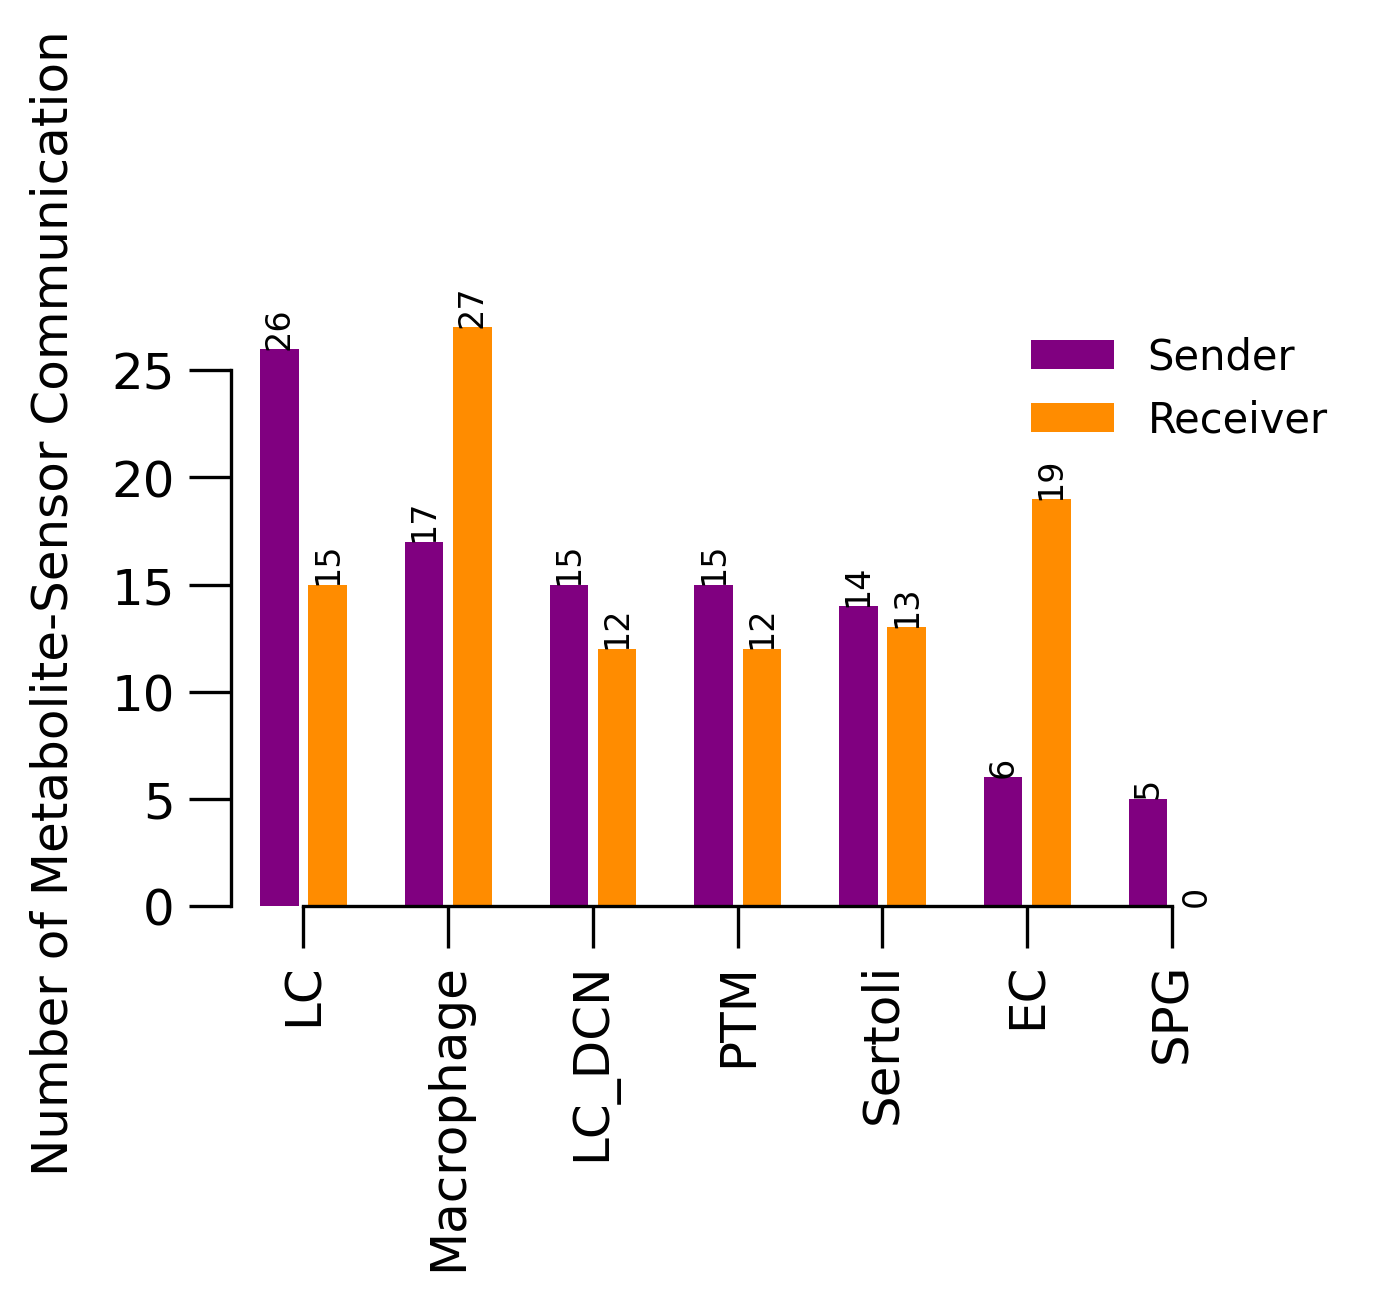

In [36]:
## sender and receiver event number
mebo_obj.eventnum_bar(
                    sender_focus=[],
                    metabolite_focus=[],
                    sensor_focus=[],
                    receiver_focus=[],
                    and_or='and',
                    pval_method='permutation_test_fdr',
                    pval_cutoff=0.05,
                    comm_score_col='Commu_Score',
                    comm_score_cutoff = 0,
                    cutoff_prop = 0.25,
                    figsize='auto',
                    save='neo_mebo_bar0508.pdf',
                    show_plot=True,
                    show_num = True,
                    include=['sender-receiver'],
                    group_by_cell=True,
                    colorcmap='tab20',
                    return_fig=False
                )

[May 08, 2023 22:06:35]: show communication in cells by network plot


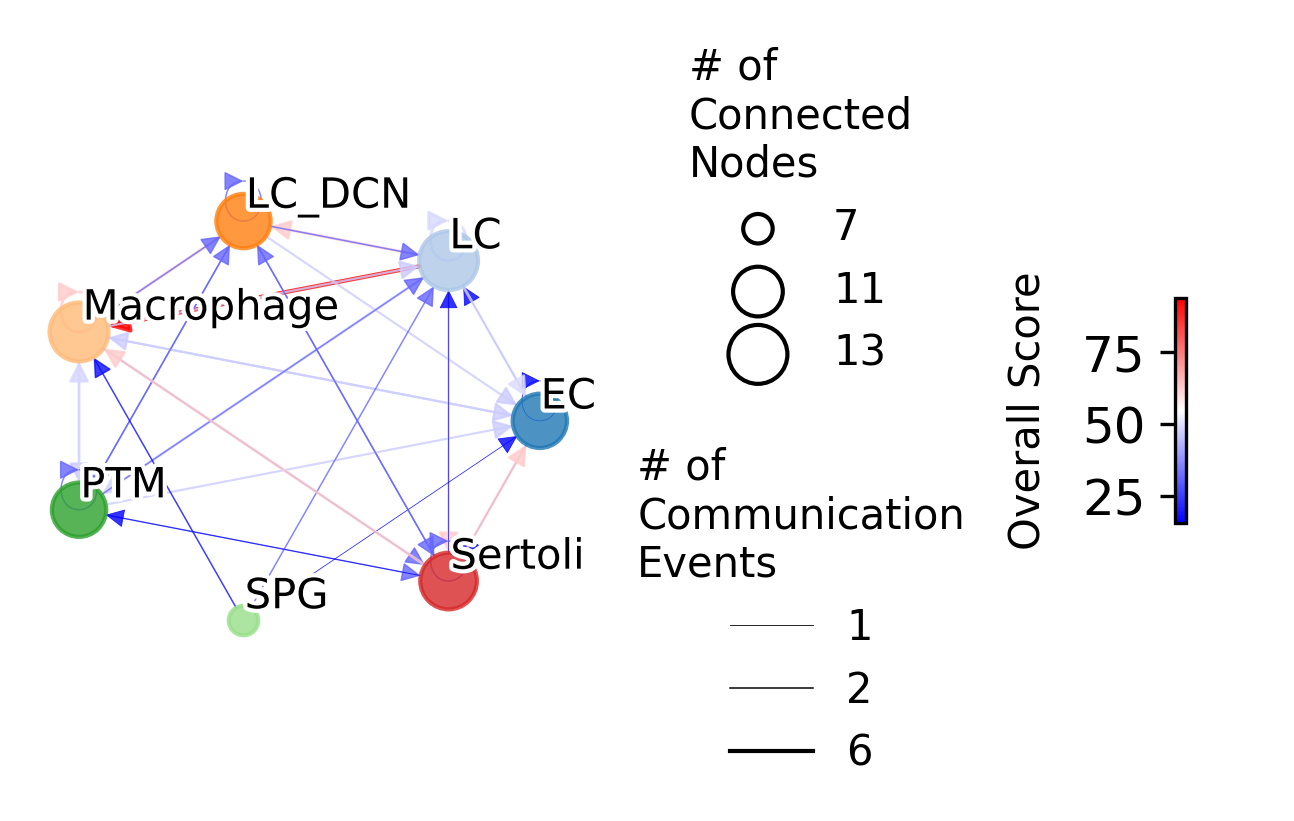

In [37]:
## circle plot to show communications between cell groups
mebo_obj.commu_network_plot(
                    sender_focus=[],
                    metabolite_focus=[],
                    sensor_focus=[],
                    receiver_focus=[],
                    and_or='and',
                    pval_method='permutation_test_fdr',
                    pval_cutoff=0.05,
                    node_cmap='tab20',
                    figsize='auto',
                    line_cmap='bwr',
                    line_color_vmin=None,
                    line_color_vmax=None,
                    linewidth_norm=(0.2, 1),
                    node_size_norm=(50, 200),
                    adjust_text_pos_node=True,
                    node_text_hidden = False,
                    node_text_font=10,
                    save='neo_mebo_network0508.pdf',
                    show_plot=True,
                    comm_score_col='Commu_Score',
                    comm_score_cutoff=0,
                    text_outline=True,
                    return_fig=False
                )


[May 08, 2023 22:12:02]: plot heatmap for significant result


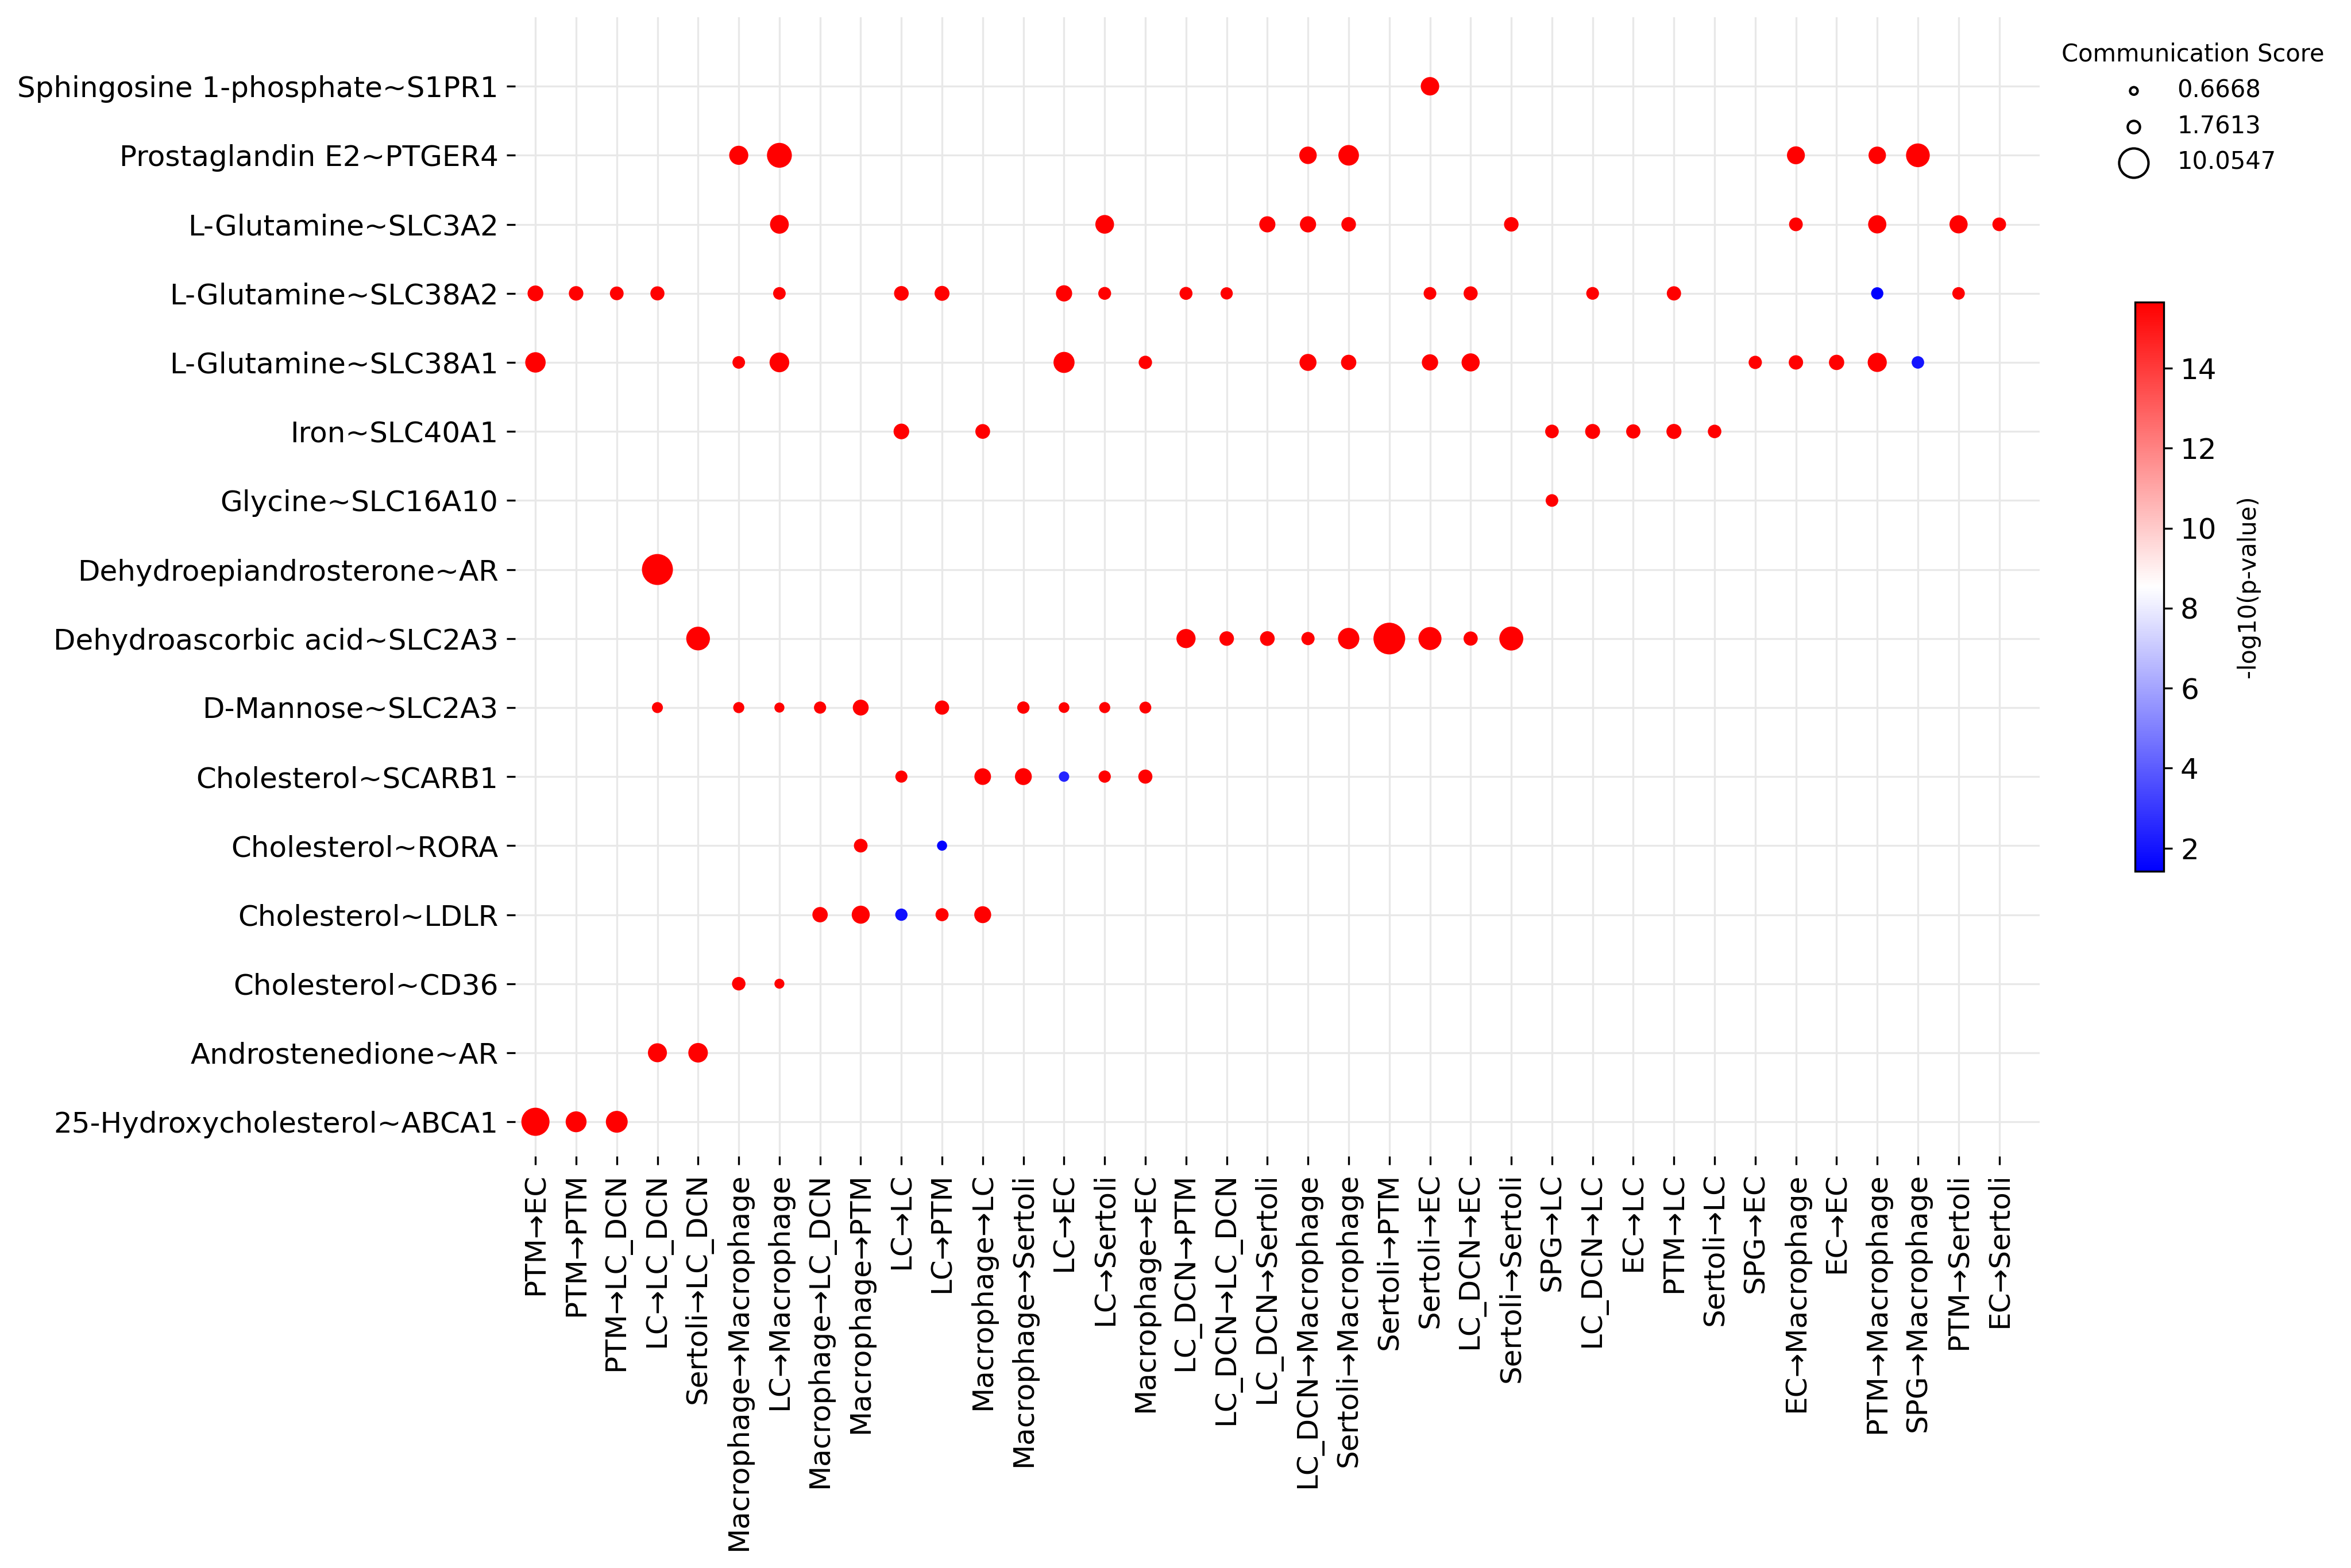

In [39]:
## Malignant cell was focused, use receiver_focus=[] to include all cell types
mebo_obj.commu_dotmap(
                sender_focus=[],
                metabolite_focus=[],
                sensor_focus=[],
                receiver_focus=[],
                and_or='and',
                pval_method='permutation_test_fdr',
                pval_cutoff=0.05,
                figsize='auto',
                cmap='bwr',
                node_size_norm=(10, 150),
                save='neo_mebo_dotmap.pdf',
                show_plot=True,
                comm_score_col='Commu_Score',
                comm_score_cutoff=0,
                swap_axis = False,
                return_fig = False
                )